In [1]:
import os
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
import xdeep.local.perturbation.xdeep_text as xdeep_text

# Please download dataset at 
# http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
# Then reset the path.

def load_polarity(path='/Users/zhangzijian/Downloads/rt-polaritydata/rt-polaritydata'):
    data = []
    labels = []
    f_names = ['rt-polarity.neg', 'rt-polarity.pos']
    for (l, f) in enumerate(f_names):
        for line in open(os.path.join(path, f), 'rb'):
            try:
                line.decode('utf8')
            except:
                continue
            data.append(line.strip())
            labels.append(l)
    return data, labels


data, labels = load_polarity()
train, test, train_labels, test_labels = model_selection.train_test_split(data, labels, test_size=.2, random_state=42)
train, val, train_labels, val_labels = model_selection.train_test_split(train, train_labels, test_size=.1, random_state=42)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

vectorizer = CountVectorizer(min_df=1)
vectorizer.fit(train)
train_vectors = vectorizer.transform(train)
test_vectors = vectorizer.transform(test)
val_vectors = vectorizer.transform(val)

x = LogisticRegression()
x.fit(train_vectors, train_labels)
c = make_pipeline(vectorizer, x)

In [2]:
explainer = xdeep_text.TextExplainer(c.predict_proba, ['negative', 'positive'])

Initialize default 'lime', 'cle', 'anchor' explainers. Please explicitly initialize 'shap' explainer before use it.
Use default nlp = spacy.load('en_core_web_sm') to initialize anchor



LIME Explanation
Instance: This is a good movie .

Explanation for label positive:
Local Prediction:     0.572
Original Prediction:  0.573

  good                 : 0.190  |  movie                : -0.060  |  This                 : -0.038  |
  is                   : 0.031  |  a                    : -0.000  |


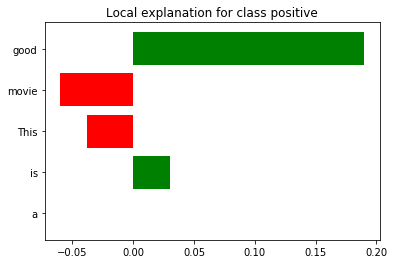

In [3]:
text = 'This is a good movie .'

explainer.explain('lime', text)
explainer.show_explanation('lime')


CLE Explanation
Instance: This is a good movie .

Explanation for label positive:
Local Prediction:     0.573
Original Prediction:  0.573

 good                 : 0.183  | movie                : -0.061  | This                 : -0.038  |
 is                   : 0.027  | is AND good          : 0.004  | good AND movie       : 0.003  |
 This AND movie       : -0.003  | This AND good        : 0.002  | is AND movie         : 0.001  |
 This AND is          : 0.001  |



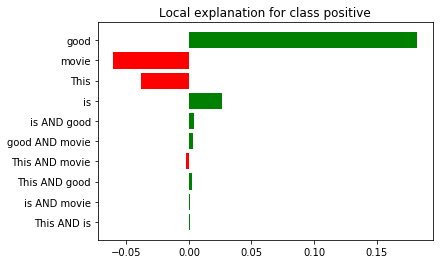

In [4]:
explainer.explain('cle', text)
explainer.show_explanation('cle')

In [5]:
explainer.explain('anchor', text)
explainer.show_explanation('anchor')


Anchor Explanation
Instance: This is a good movie .


Examples where anchor applies and model predicts same to instance:

UNK is a good movie UNK
UNK UNK a good UNK .
UNK is UNK good UNK UNK
This is a good UNK .
UNK UNK a good UNK .
This UNK a good movie UNK
This is a good UNK .
UNK is a good movie UNK
UNK UNK UNK good UNK .
This is UNK good movie UNK

Examples where anchor applies and model predicts different with instance:


Prediction: 1
Anchor: good
Precision: 1.00
Coverage: 0.50


In [6]:
explainer.initialize_shap(x.predict_proba, vectorizer, train[0:10])
explainer.explain('shap', text)
explainer.show_explanation('shap')


Shap Explanation

Shap value for label positive:
[[0. 0. 0. ... 0. 0. 0.]]
